<a href="https://colab.research.google.com/github/esintopaktas/DSA-210/blob/main/WageInsurance_Hypothesis_Preprocessing_and_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data** **Preprocessing**





In [17]:
import pandas as pd


wage_df = pd.read_csv("median_average_wages.csv")
insurance_df = pd.read_csv("health_insurance_coverage.csv")


wage_df = wage_df[(wage_df["year"] >= 2000) & (wage_df["year"] <= 2019)]
insurance_df = insurance_df[(insurance_df["year"] >= 2000) & (insurance_df["year"] <= 2019)]


wage_filtered = wage_df[[
    "year",
    "men_average",
    "women_average",
    "white_men_average",
    "black_men_average"
]]

insurance_filtered = insurance_df[[
    "year",
    "men",
    "women",
    "white_men",
    "black_men"
]]


preprocessed_df = pd.merge(wage_filtered, insurance_filtered, on="year")


preprocessed_df.to_csv("Preprocessed_Dataset_for_Hypothesis_Testing.csv", index=False)


# Hypothesis Testing
Null Hypothesis (H₀):

There is no difference in correlation between average hourly wages and health insurance coverage for men compared to women.

Alternative Hypothesis (H₁):

There is a stronger correlation between average hourly wages and health insurance coverage for men compared to women.


In [18]:
import pandas as pd
from scipy.stats import ttest_ind


df = pd.read_csv("Preprocessed_Dataset_for_Hypothesis_Testing.csv")

diff_men = df["men_average"] - df["men"]
diff_women = df["women_average"] - df["women"]


t_stat_1, p_two_sided_1 = ttest_ind(diff_men, diff_women, equal_var=False)


p_one_sided_1 = p_two_sided_1 / 2 if t_stat_1 > 0 else 1 - p_two_sided_1 / 2


print("🔹 Hypothesis 1: Men > Women (wage-insurance proxy)")
print(f"T-statistic: {t_stat_1:.4f}")
print(f"One-sided p-value: {p_one_sided_1:.4f}")
print("Significant at α = 0.05?", p_one_sided_1 < 0.05)


🔹 Hypothesis 1: Men > Women (wage-insurance proxy)
T-statistic: -0.6856
One-sided p-value: 0.7513
Significant at α = 0.05? False


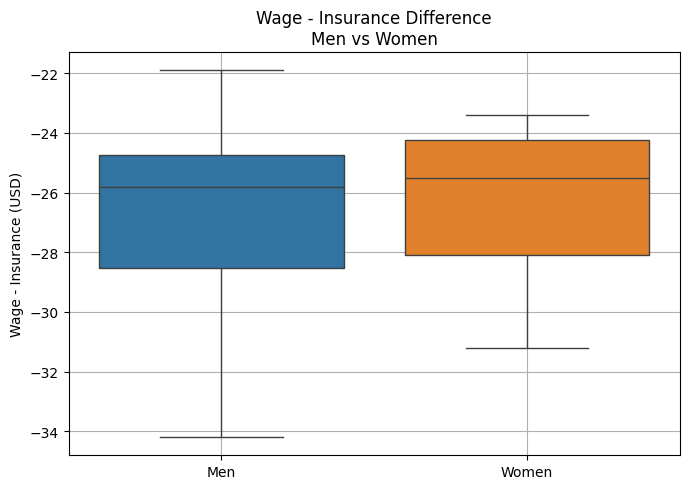

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Preprocessed_Dataset_for_Hypothesis_Testing.csv")


df["men_diff"] = df["men_average"] - df["men"]
df["women_diff"] = df["women_average"] - df["women"]


plt.figure(figsize=(7, 5))
sns.boxplot(data=pd.DataFrame({
    "Men": df["men_diff"],
    "Women": df["women_diff"]
}))
plt.title("Wage - Insurance Difference\nMen vs Women")
plt.ylabel("Wage - Insurance (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


Null Hypothesis (H₀):

There is no difference in correlation between average hourly wages and health insurance coverage for White men compared to Black men.

Alternative Hypothesis (H₁):

There is a stronger correlation between average hourly wages and health insurance coverage for White men compared to Black men.

In [21]:

diff_white = df["white_men_average"] - df["white_men"]
diff_black = df["black_men_average"] - df["black_men"]


t_stat_2, p_two_sided_2 = ttest_ind(diff_white, diff_black, equal_var=False)


p_one_sided_2 = p_two_sided_2 / 2 if t_stat_2 > 0 else 1 - p_two_sided_2 / 2


print("🔹 Hypothesis 2: White Men > Black Men (wage-insurance proxy)")
print(f"T-statistic: {t_stat_2:.4f}")
print(f"One-sided p-value: {p_one_sided_2:.4f}")
print("Significant at α = 0.05?", p_one_sided_2 < 0.05)


🔹 Hypothesis 2: White Men > Black Men (wage-insurance proxy)
T-statistic: -0.8095
One-sided p-value: 0.7880
Significant at α = 0.05? False


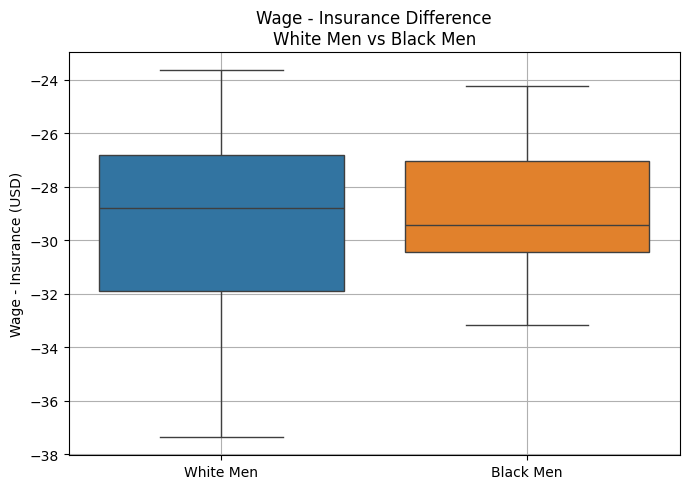

In [20]:

df["white_diff"] = df["white_men_average"] - df["white_men"]
df["black_diff"] = df["black_men_average"] - df["black_men"]


plt.figure(figsize=(7, 5))
sns.boxplot(data=pd.DataFrame({
    "White Men": df["white_diff"],
    "Black Men": df["black_diff"]
}))
plt.title("Wage - Insurance Difference\nWhite Men vs Black Men")
plt.ylabel("Wage - Insurance (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


# Data Visualization

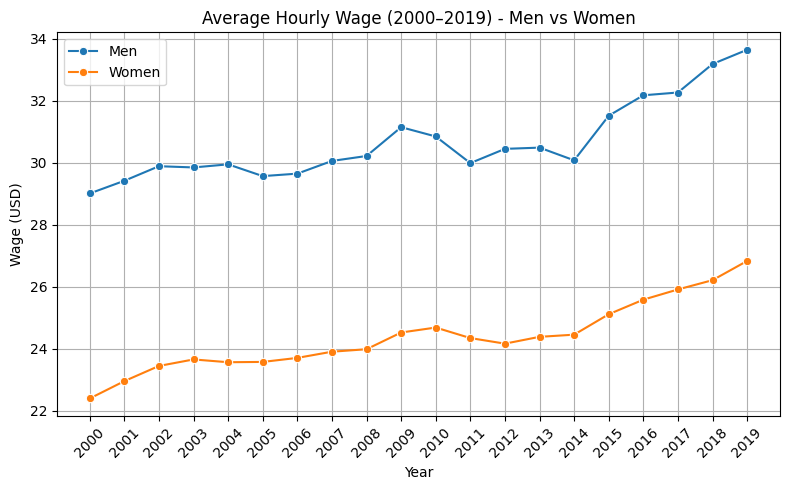

In [8]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=wage_df["year"], y=wage_df["men_average"], label="Men", marker="o")
sns.lineplot(x=wage_df["year"], y=wage_df["women_average"], label="Women", marker="o")
plt.title("Average Hourly Wage (2000–2019) - Men vs Women")
plt.xlabel("Year")
plt.ylabel("Wage (USD)")
plt.grid(True)
plt.xticks(range(2000, 2020), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


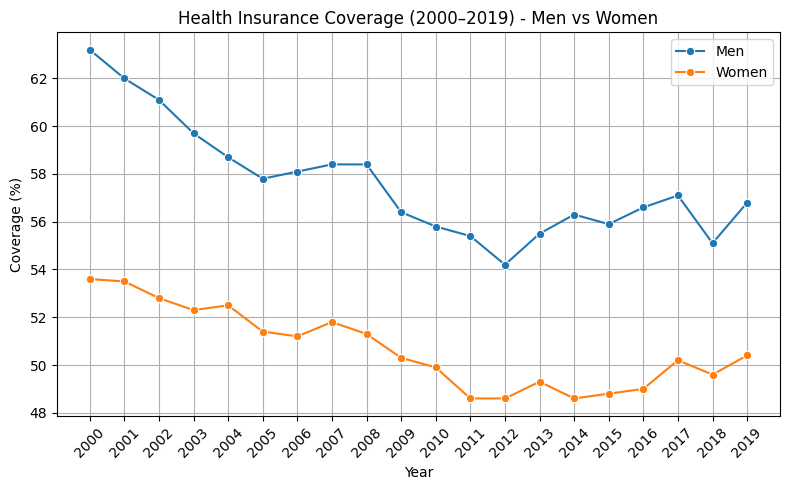

In [9]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=insurance_df["year"], y=insurance_df["men"], label="Men", marker="o")
sns.lineplot(x=insurance_df["year"], y=insurance_df["women"], label="Women", marker="o")
plt.title("Health Insurance Coverage (2000–2019) - Men vs Women")
plt.xlabel("Year")
plt.ylabel("Coverage (%)")
plt.grid(True)
plt.xticks(range(2000, 2020), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


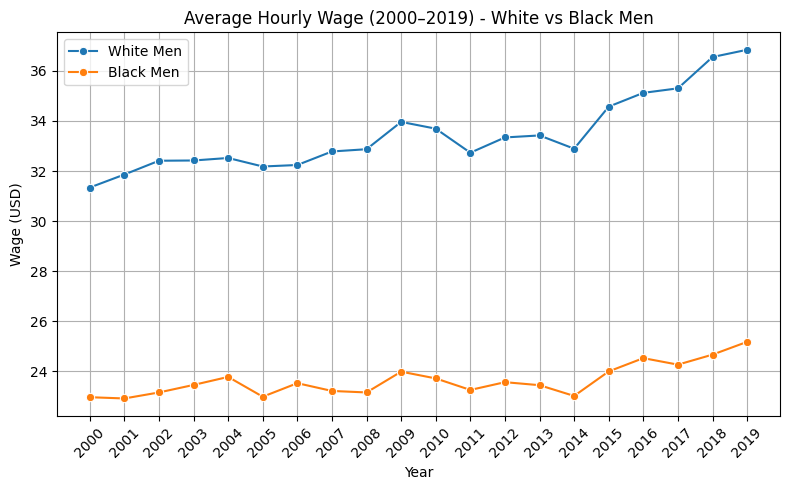

In [10]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=wage_df["year"], y=wage_df["white_men_average"], label="White Men", marker="o")
sns.lineplot(x=wage_df["year"], y=wage_df["black_men_average"], label="Black Men", marker="o")
plt.title("Average Hourly Wage (2000–2019) - White vs Black Men")
plt.xlabel("Year")
plt.ylabel("Wage (USD)")
plt.grid(True)
plt.xticks(range(2000, 2020), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


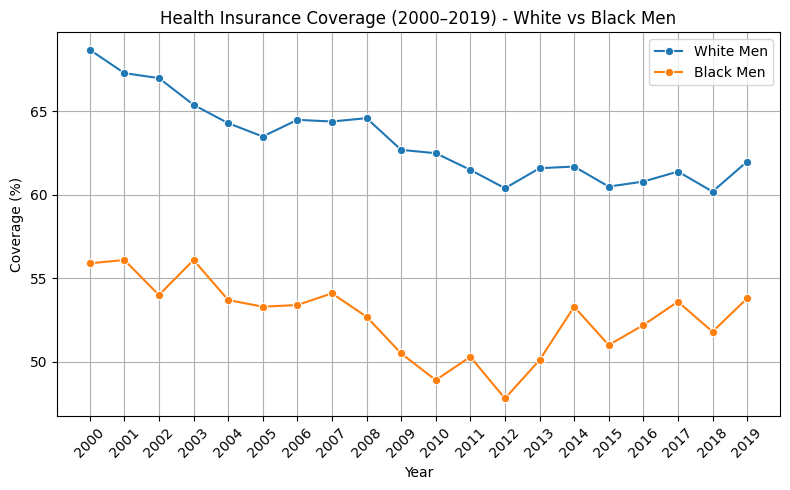

In [11]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=insurance_df["year"], y=insurance_df["white_men"], label="White Men", marker="o")
sns.lineplot(x=insurance_df["year"], y=insurance_df["black_men"], label="Black Men", marker="o")
plt.title("Health Insurance Coverage (2000–2019) - White vs Black Men")
plt.xlabel("Year")
plt.ylabel("Coverage (%)")
plt.grid(True)
plt.xticks(range(2000, 2020), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
